In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'world-happiness-report-2024-yearly-updated:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5016030%2F8424425%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240730%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240730T003020Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d0cc1977ddf085f48872900cf59d7001f5b7fc494e5a0c67b1849d080b6993fedf15f373432fefc27546d515a3971b59480dc56d618b14621e3b91770131e05051861fed8be2a4e3c840c8ce8b060e0c7eab9a954c17ad15c93387435aed07968840e4bb7a7ea5213e183ac5c6c6892593a762b9ecf5cb6ce3dacb1281890aa7992792ffe56543df611dbc0652f3516bde65aac31a4484a706e7909f226c9efe1f12f2a65142003280986ede5121e9e70a16090c928136721dc5c000212d0dcdfd6f21d4f422e295b356c605602dedeff6c0acbc7d1e504f1117302271a2520d0eab12193de9fac7fd78b0a425b7ec39889b6ce587498739202364dcb37adc5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 63424 bytes downloaded
Downloaded and uncompressed: world-happiness-report-2024-yearly-updated
Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv


## WORLD HAPPİNESS EXPLORATORY DATA ANALYSİS

# Reading data

In [7]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns

# read data
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin-1')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [8]:
df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191
2362,Zimbabwe,2023,3.572,7.679,0.694,55.000,0.735,-0.069,0.757,0.610,0.179


In [9]:
# describe basic statistics of data
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [10]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [11]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [12]:
# Exclude filling non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [13]:
# read data for 2024
df2024 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding='latin-1')
df2024.head(5)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [14]:
# describe basic statistics of data
df2024.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [15]:
# information about data
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [16]:
df2024.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [17]:
# Exclude non-numeric columns to fill missing values
numeric_cols = df2024.select_dtypes(include=np.number).columns
df2024[numeric_cols] = df2024[numeric_cols].fillna(df2024[numeric_cols].mean())

# Data Distributions in 2024

In [18]:
# unique countries
df2024['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

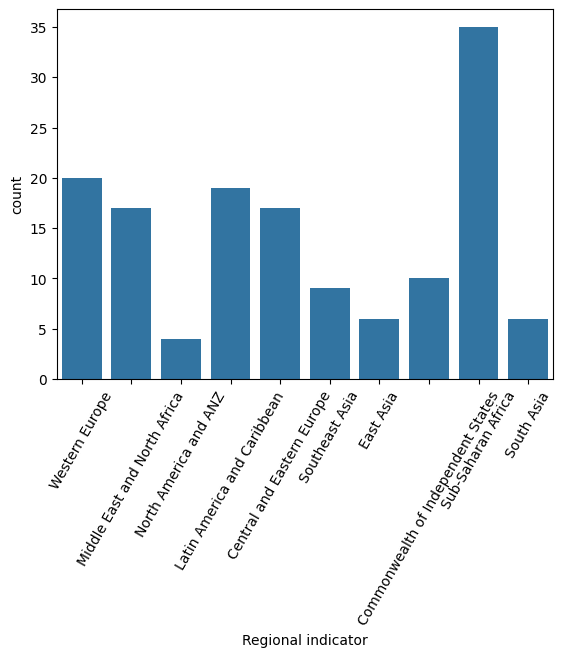

In [19]:
#count regional indicator
sns.countplot(x ='Regional indicator', data = df2024)
plt.xticks(rotation = 60)
plt.show()

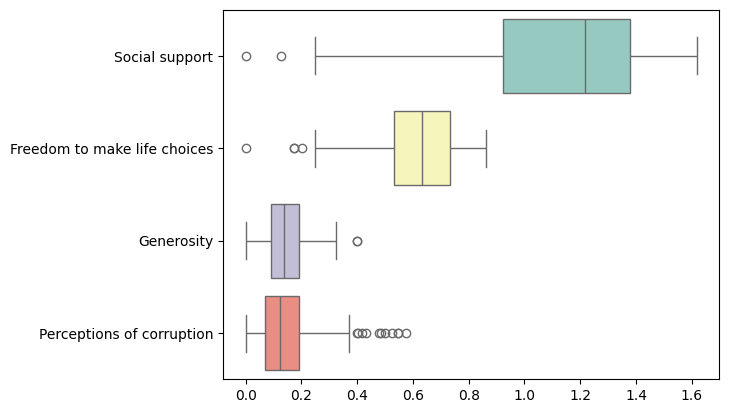

In [20]:
# distribution of Social support,Freedom to make life choices,Generosity,Perceptions of corruption
list_features = ['Social support','Freedom to make life choices','Generosity','Perceptions of corruption']
sns.boxplot(data=df2024.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

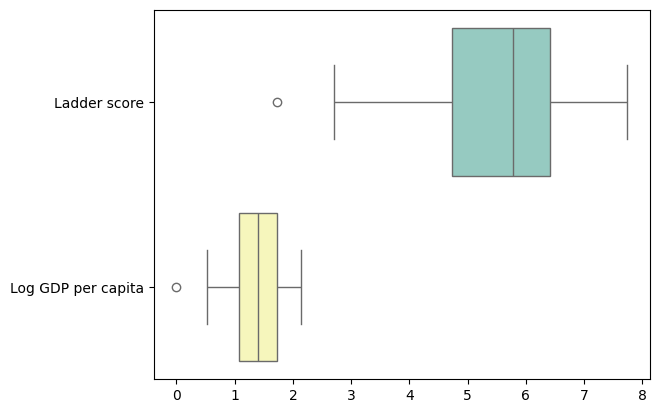

In [21]:
# distribution of Ladder score and Logged GDP per capita
list_features = ['Ladder score','Log GDP per capita']
sns.boxplot(data=df2024.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

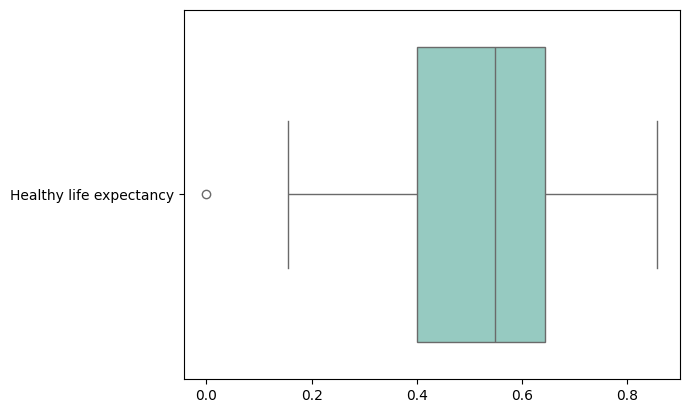

In [22]:
# distribution of Healthy life expectancy
list_features = ['Healthy life expectancy']
sns.boxplot(data=df2024.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

# Happiest and Unhappiest Countries in 2024

<ipython-input-23-6f3497246cff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Ladder score', y= 'Country name',data = df2024_happiest_unhappiest, palette = 'coolwarm')


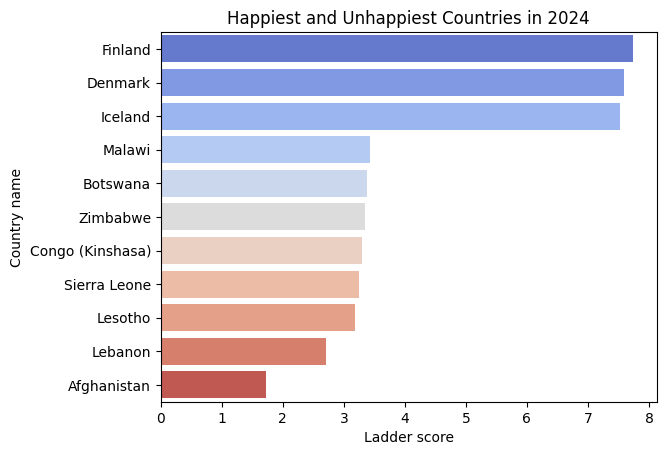

In [23]:
df2024_happiest_unhappiest = df2024[(df2024.loc[:,'Ladder score']>7.4)|(df2024.loc[:,'Ladder score']<3.5)]
sns.barplot(x = 'Ladder score', y= 'Country name',data = df2024_happiest_unhappiest, palette = 'coolwarm')
plt.title('Happiest and Unhappiest Countries in 2024')
plt.show()

# Ladder Score Distribution by Regional Indicator

# Ladder Score Distribution by Countries in Map View


In [24]:
import plotly.express as px
fig = px.choropleth(df.sort_values('year'),
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title = 'Life Ladder Comparison by Contries' )

# Most Generous and Most Ungenerous Countries in 2024

<ipython-input-25-eccc37072844>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




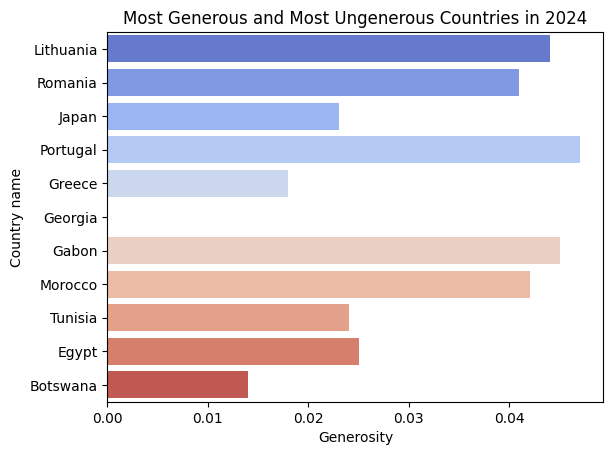

In [25]:
df2024_generosity = df2024[(df2024.loc[:,'Generosity']>0.6)|(df2024.loc[:,'Generosity']<0.05)]
sns.barplot(x = 'Generosity', y = 'Country name', data = df2024_generosity ,palette= 'coolwarm')
plt.title('Most Generous and Most Ungenerous Countries in 2024')
plt.show()

# Generous Distribution by Countries in Map View

In [26]:
fig = px.choropleth(df.sort_values('year'),
                   locations = 'Country name',
                   color = 'Generosity',
                   locationmode = 'country names',
                   animation_frame = 'year')
fig.update_layout(title = 'Generosity Comparison by Countries')
fig.show()

# Generous Distribution by Regional Indicator in 2021

<ipython-input-27-7ca10a5aa9fe>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



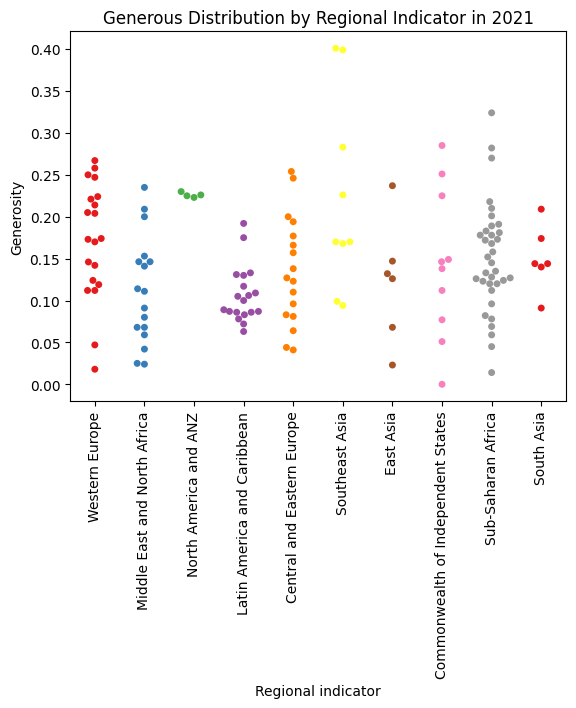

In [27]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df2024, palette="Set1")
plt.xticks(rotation = 90)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

# Relationship Between Features

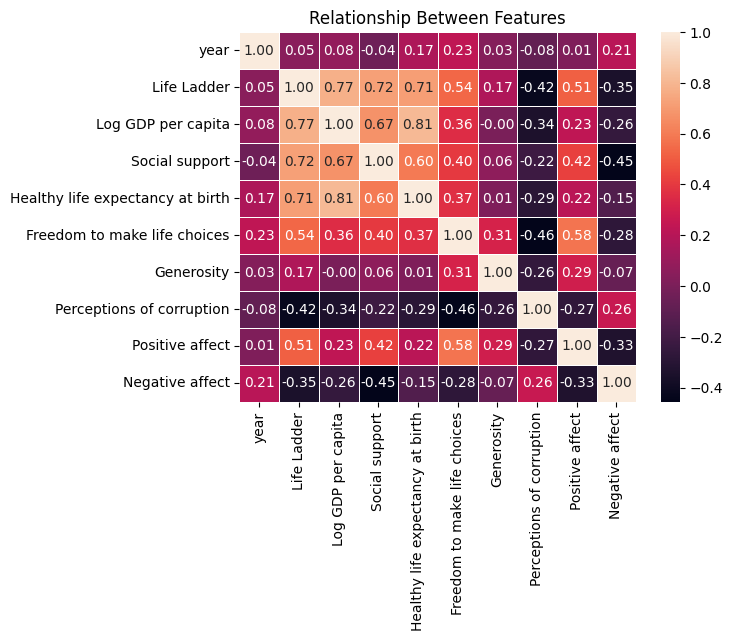

In [28]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7)
plt.title('Relationship Between Features')
plt.show()

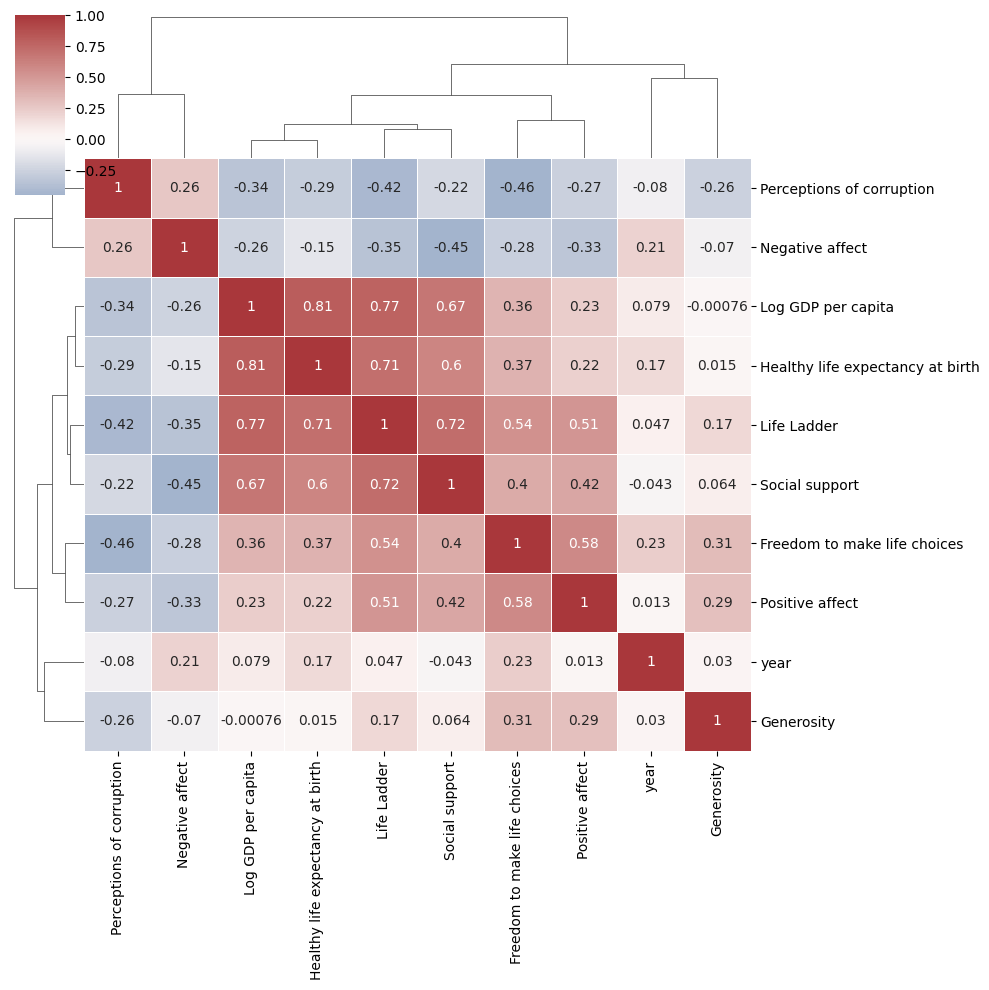

In [29]:
sns.clustermap(correlation_matrix, center = 0, cmap = 'vlag', dendrogram_ratio = (0.1,0.2), annot = True, linewidth = .7, figsize=(10,10))
plt.show()